In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import astropy
from astropy.io import fits

In [2]:
filters=['vv','bb','uu','w1','m2','w2']
#filters=['w2']
comps=['1','2','3','4','5','6','7','8','9','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19']
#comps=['08','09','10','11','12','13','14','15','16','17','18','19']
#comps=['07']#,'08']#,'09']#,'10']#,'11','12','13']#,'14','15','16','17','18','19']
fields=['M51','SN2006aj','SN2006jc'] 
#fields=['SN2006jc'] 
#fields=['SN2006jc','SN2006aj','M51'] 
#fields=['SN2006aj'] 
colors=['#00429d','#73a2c6', '#f4777f', '#93003a']
#centroidcolors=['#73a2c6', '#f4777f', '#93003a','#00429d']
#colors=['blue','green', 'red', 'purple']
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')


M51 vv 02


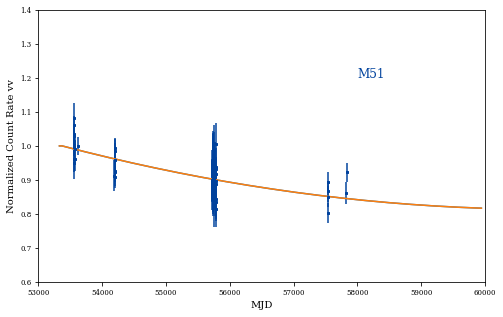

M51 vv 03


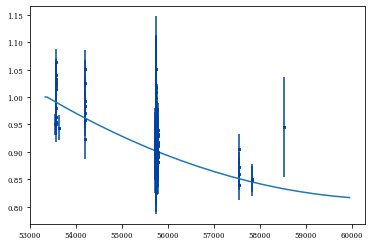

M51 vv 04


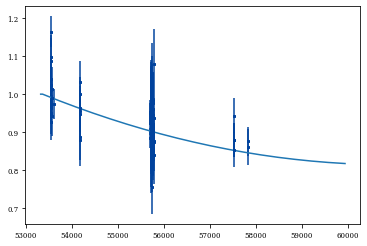

M51 vv 06


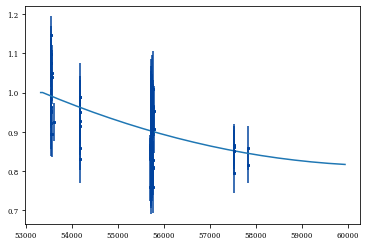

M51 vv 07


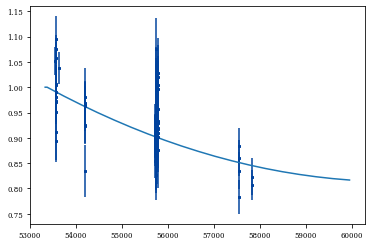

M51 vv 08


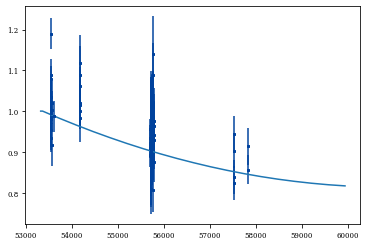

M51 vv 09


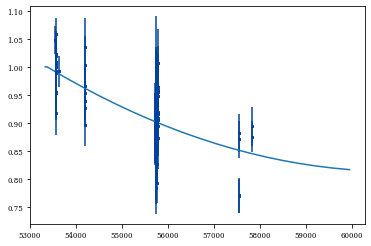

M51 vv 10


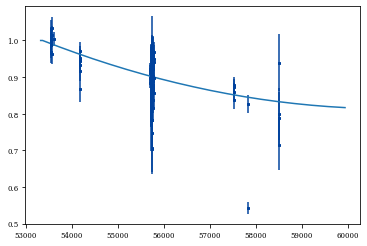

SN2006aj vv 01


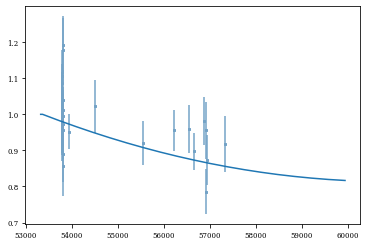

SN2006aj vv 02


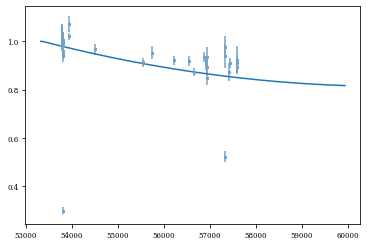

SN2006aj vv 03


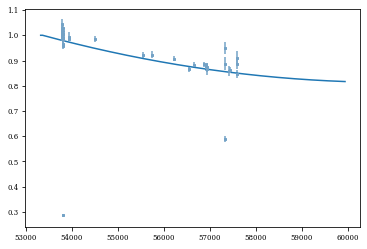

SN2006aj vv 04


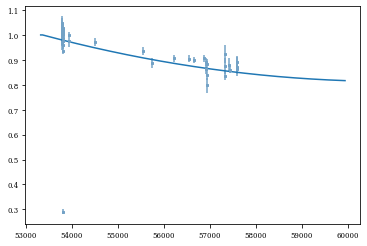

SN2006aj vv 05


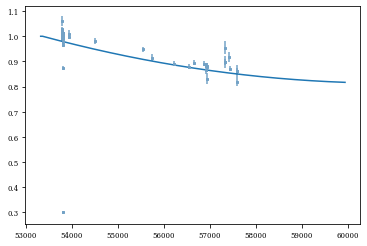

SN2006aj vv 06


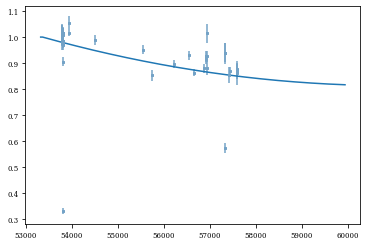

SN2006aj vv 07


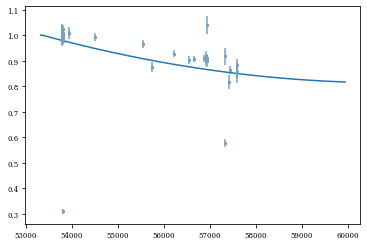

SN2006aj vv 08


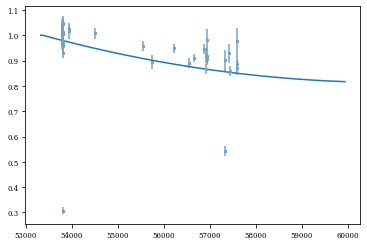

SN2006aj vv 10


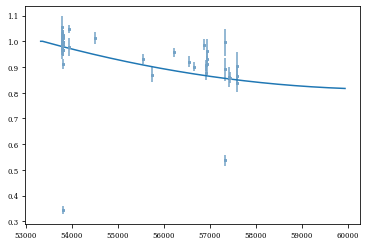

SN2006aj vv 11


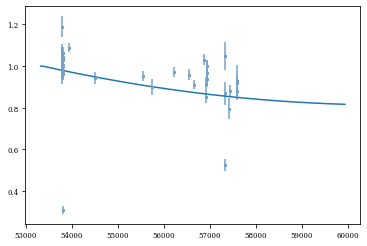

SN2006aj vv 12


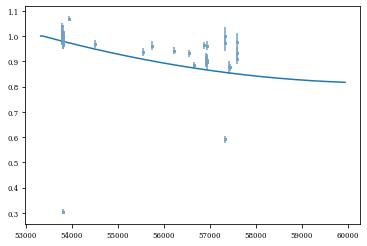

SN2006aj vv 13


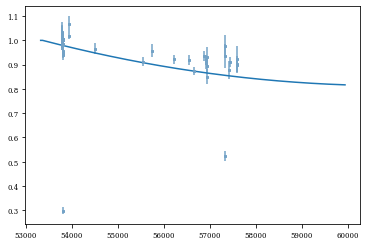

SN2006aj vv 15


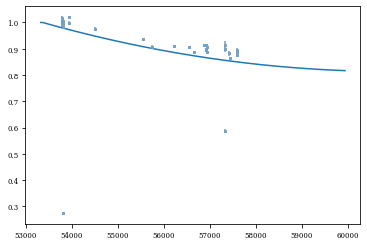

SN2006aj vv 17


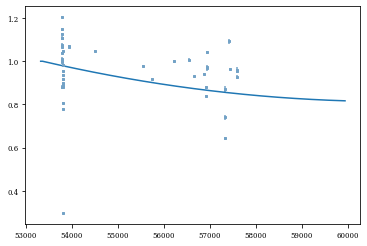

SN2006aj vv 19


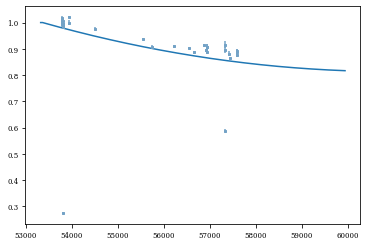

SN2006jc vv 4


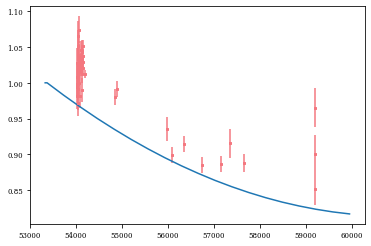

SN2006jc vv 5


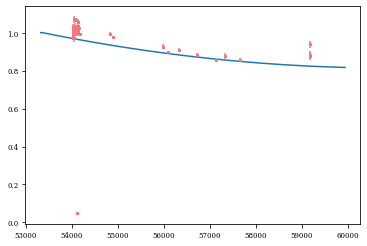

SN2006jc vv 6


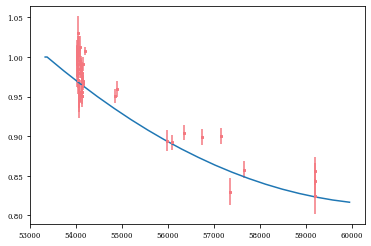

SN2006jc vv 7


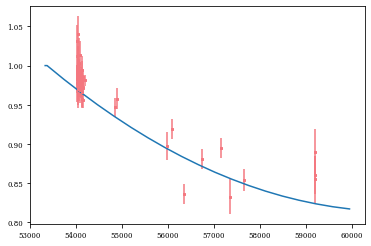

SN2006jc vv 8


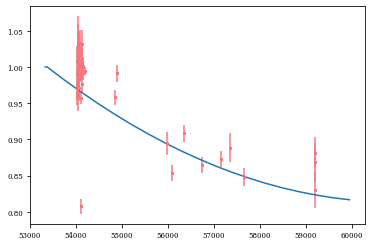

SN2006jc vv 9


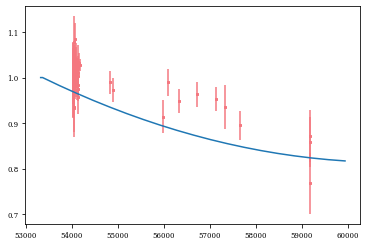

SN2006jc vv 10


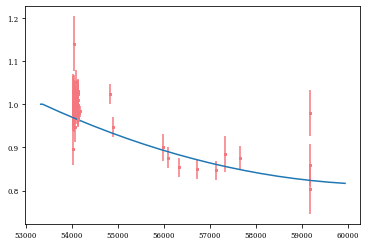

SN2006jc vv 11


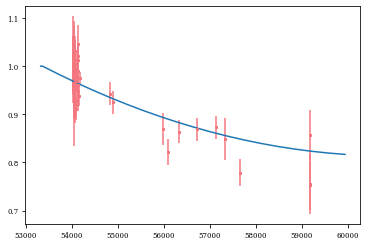

SN2006jc vv 12


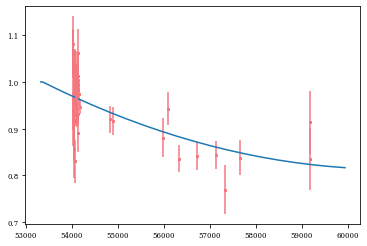

SN2006jc vv 13


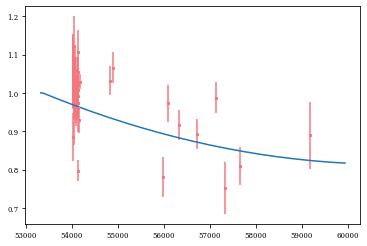

M51 bb 02


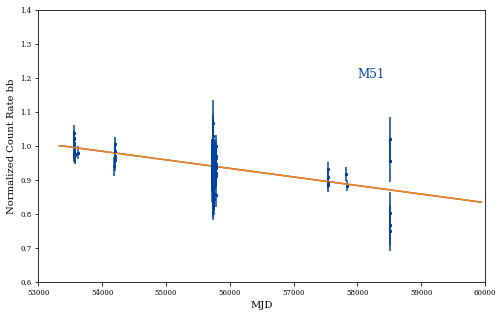

M51 bb 03


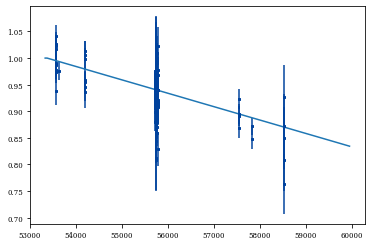

M51 bb 04


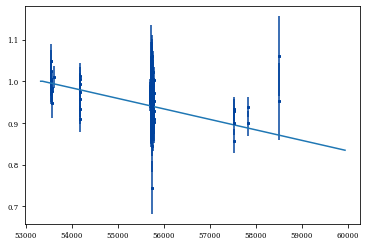

M51 bb 06


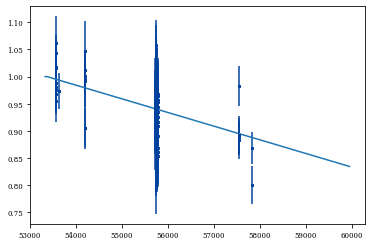

M51 bb 07


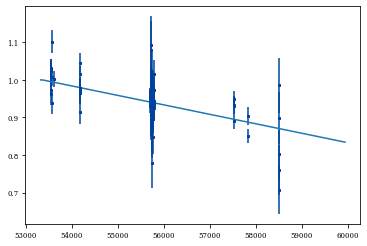

M51 bb 08


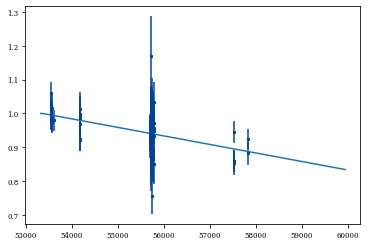

M51 bb 09


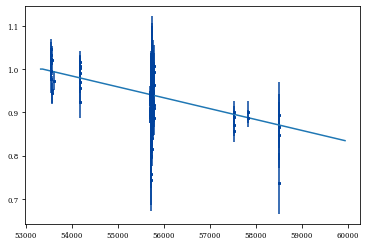

M51 bb 10


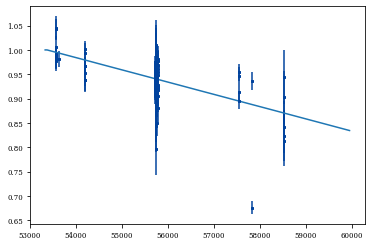

SN2006aj bb 01


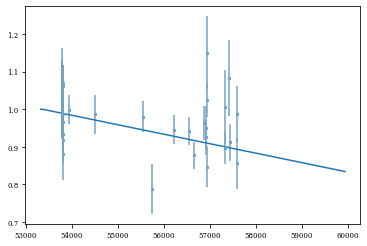

SN2006aj bb 02


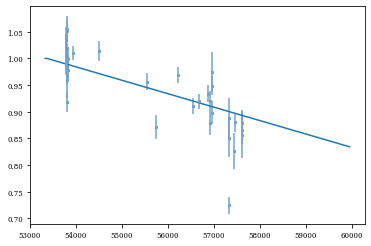

SN2006aj bb 03


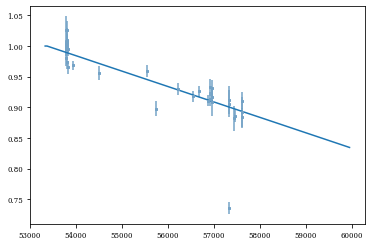

SN2006aj bb 04


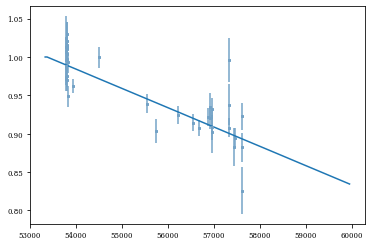

SN2006aj bb 05


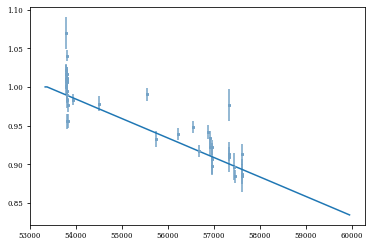

SN2006aj bb 06


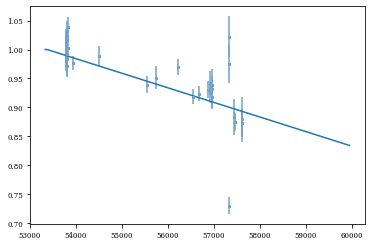

SN2006aj bb 07


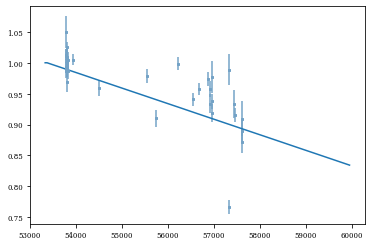

SN2006aj bb 08


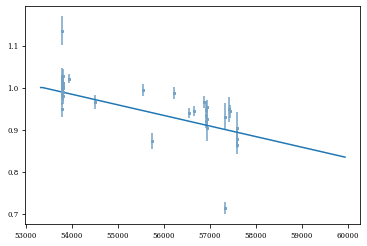

SN2006aj bb 10


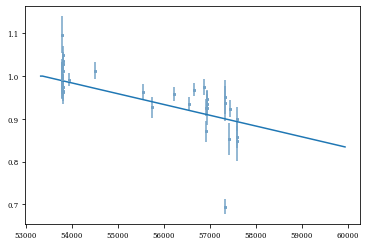

SN2006aj bb 11


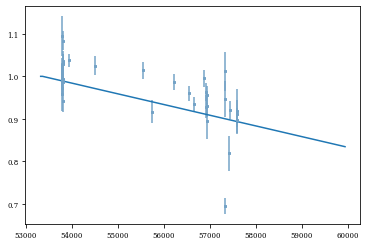

SN2006aj bb 12


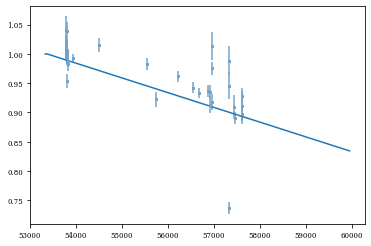

SN2006aj bb 13


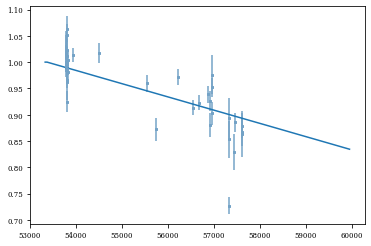

SN2006aj bb 15


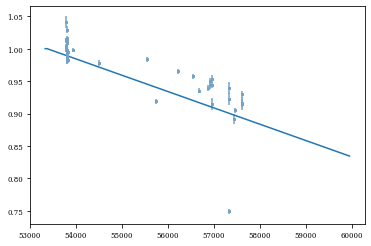

SN2006aj bb 19


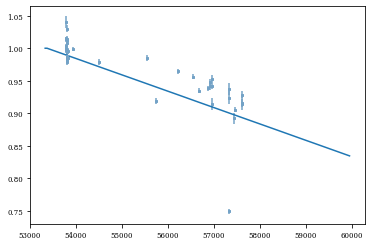

SN2006jc bb 4


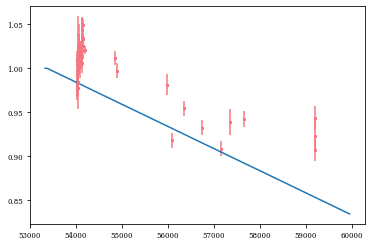

SN2006jc bb 5


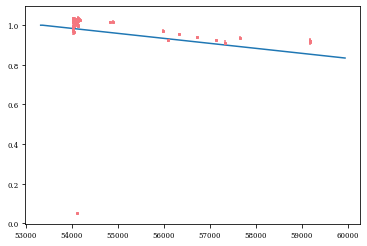

SN2006jc bb 6


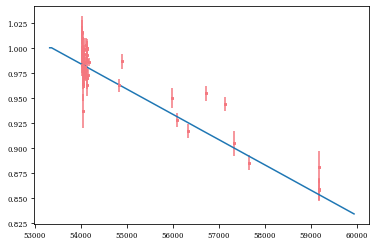

SN2006jc bb 7


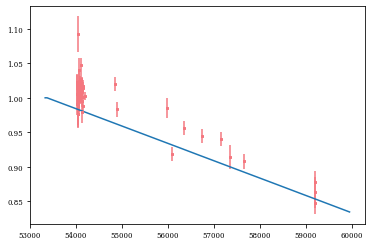

SN2006jc bb 8


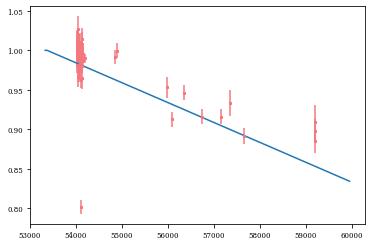

SN2006jc bb 9


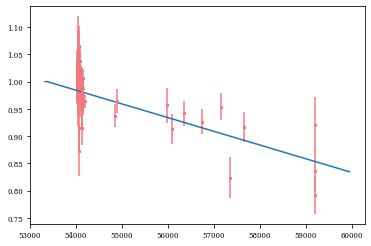

SN2006jc bb 10


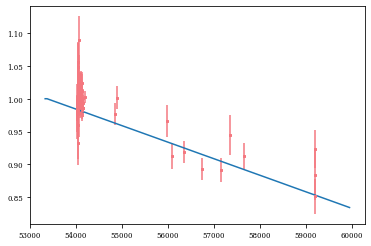

SN2006jc bb 11


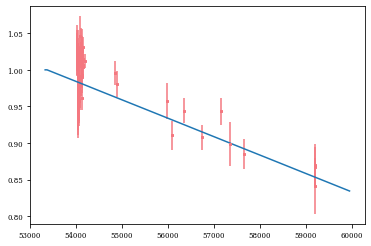

SN2006jc bb 12


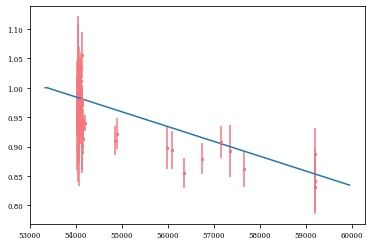

SN2006jc bb 13


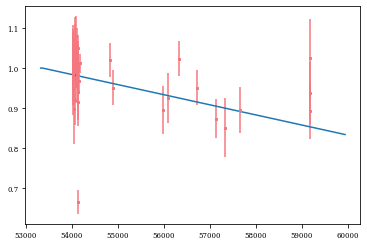

M51 uu 02


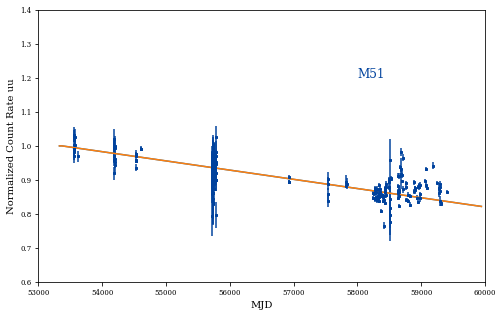

M51 uu 03


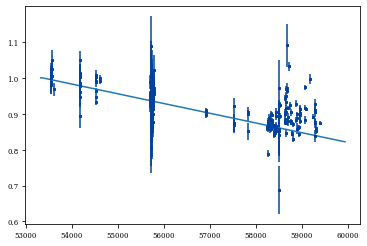

M51 uu 04


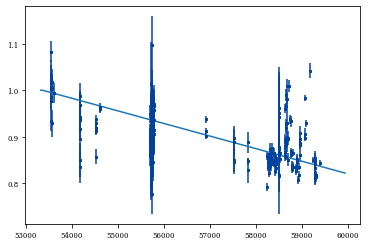

M51 uu 05


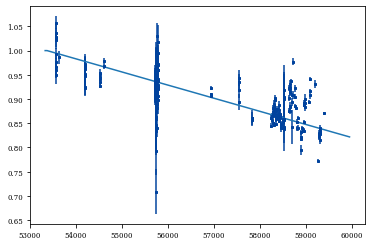

M51 uu 06


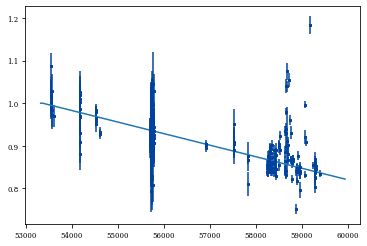

M51 uu 07


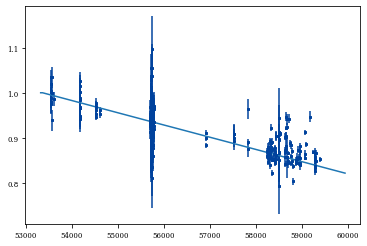

M51 uu 08


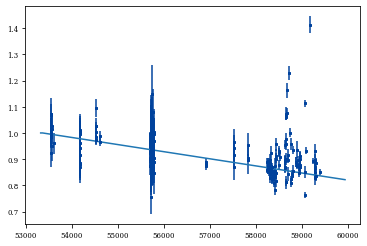

M51 uu 09


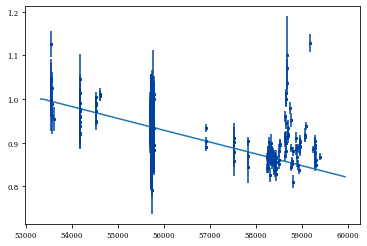

M51 uu 10


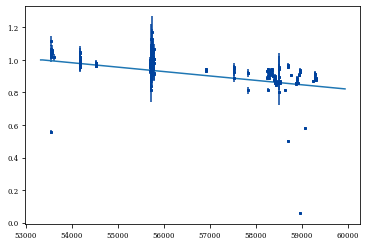

SN2006aj uu 01


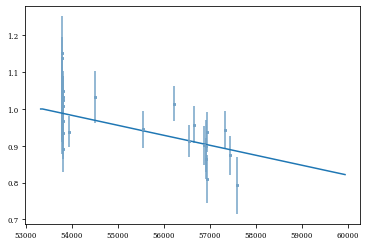

SN2006aj uu 02


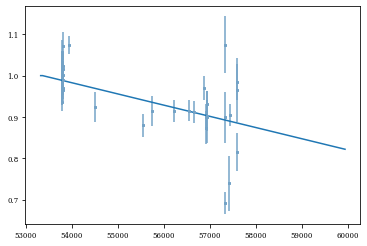

SN2006aj uu 03


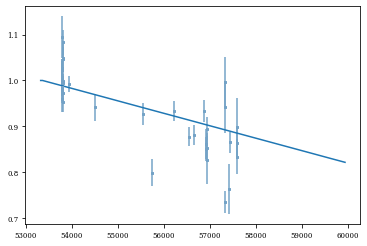

SN2006aj uu 04


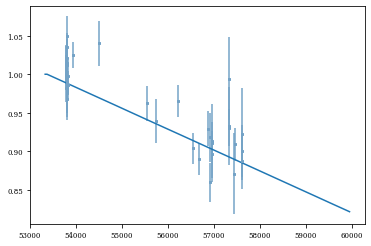

SN2006aj uu 05


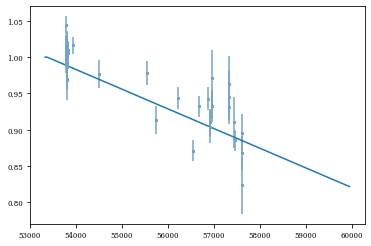

SN2006aj uu 06


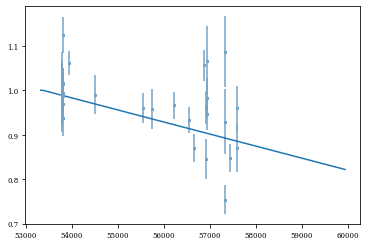

SN2006aj uu 07


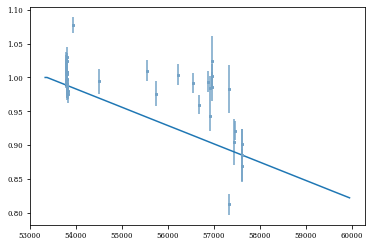

SN2006aj uu 08


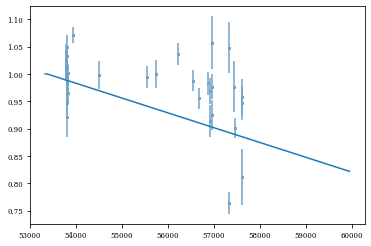

SN2006aj uu 09


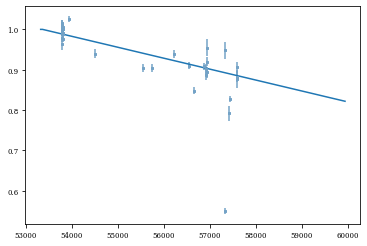

SN2006aj uu 10


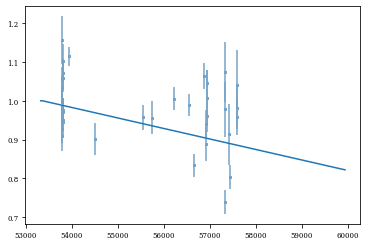

SN2006aj uu 11


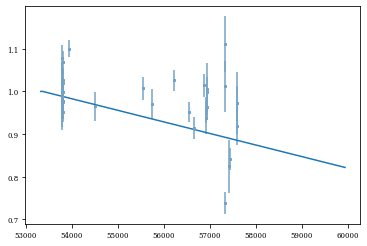

SN2006aj uu 12


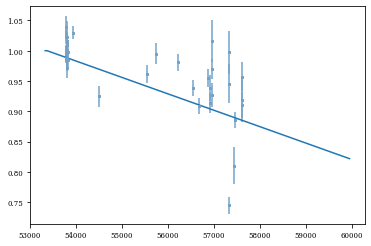

SN2006aj uu 13


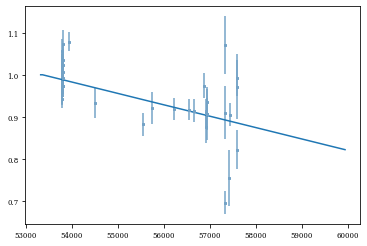

SN2006aj uu 15


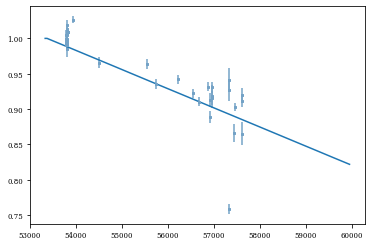

SN2006aj uu 17


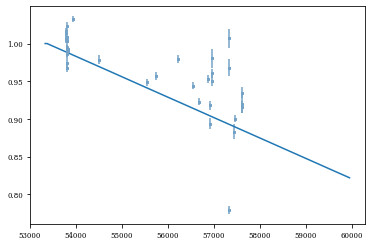

SN2006aj uu 19


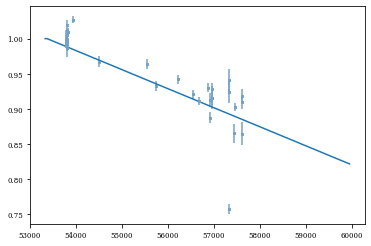

SN2006jc uu 3


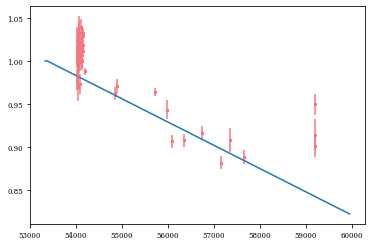

SN2006jc uu 4


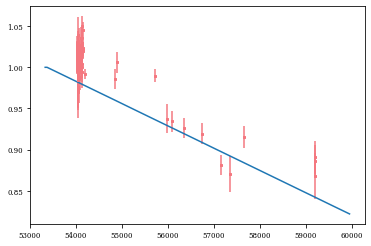

SN2006jc uu 5


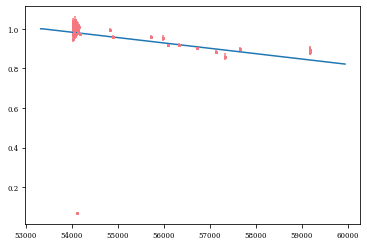

SN2006jc uu 6


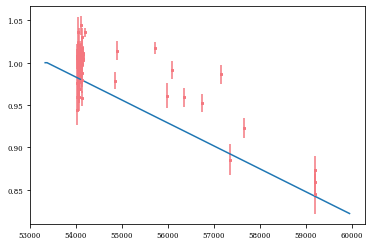

SN2006jc uu 7


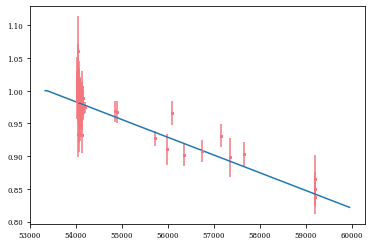

SN2006jc uu 8


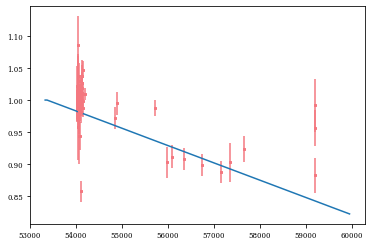

SN2006jc uu 9


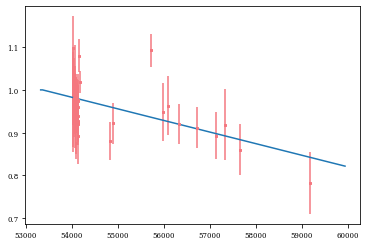

SN2006jc uu 10


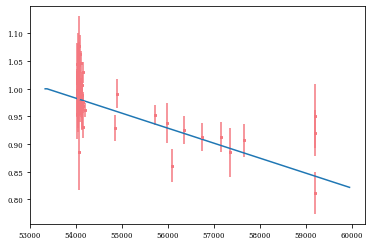

SN2006jc uu 11


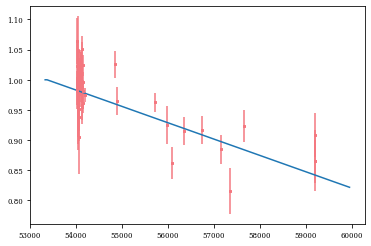

SN2006jc uu 12


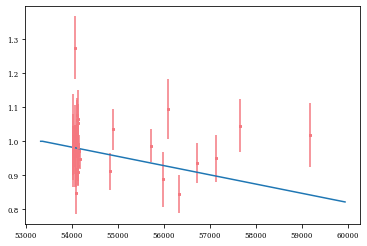

SN2006jc uu 13


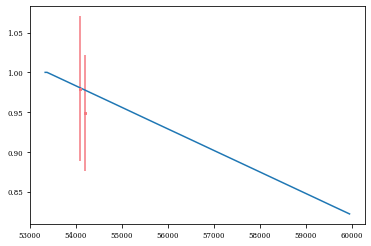

M51 w1 01


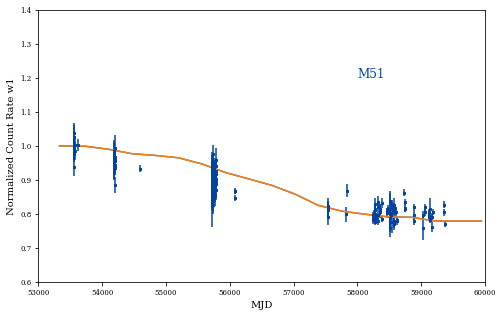

M51 w1 02


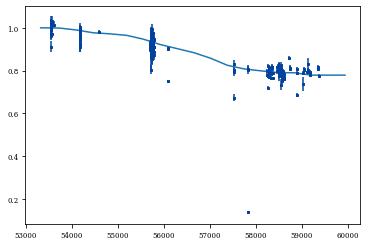

M51 w1 03


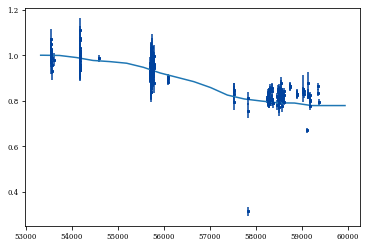

M51 w1 04


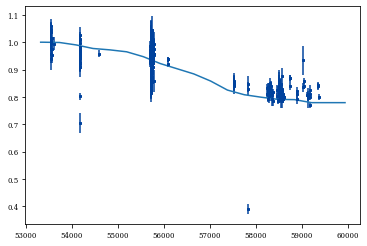

M51 w1 05


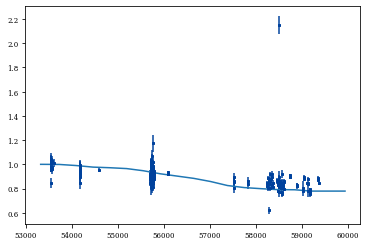

M51 w1 06


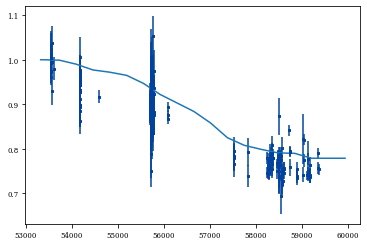

M51 w1 07


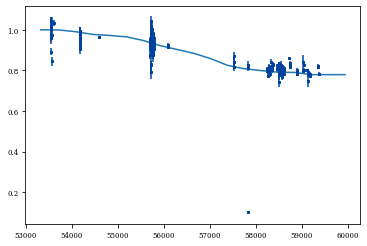

M51 w1 08


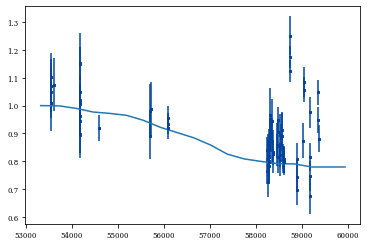

M51 w1 09


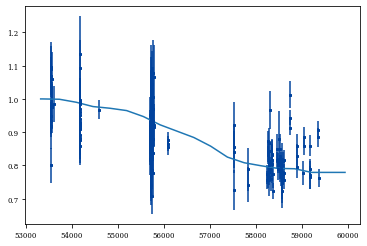

M51 w1 10


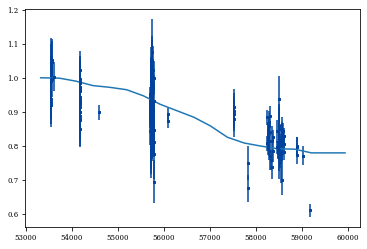

SN2006aj w1 01


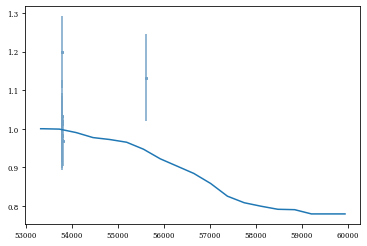

SN2006aj w1 02


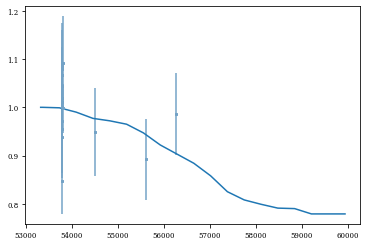

SN2006aj w1 03


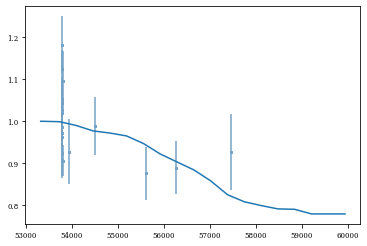

SN2006aj w1 04


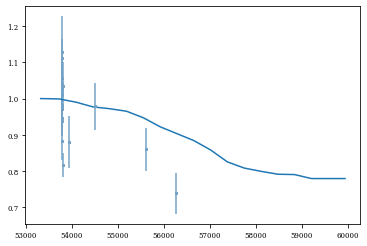

SN2006aj w1 05


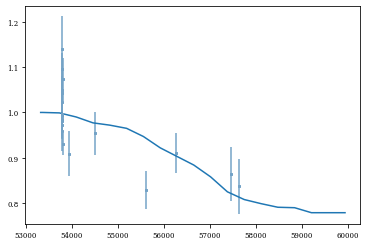

SN2006aj w1 06


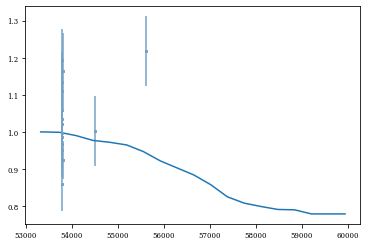

SN2006aj w1 07


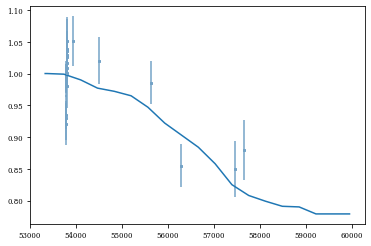

SN2006aj w1 08


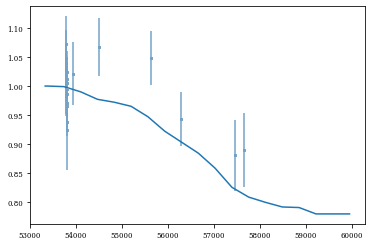

SN2006aj w1 09


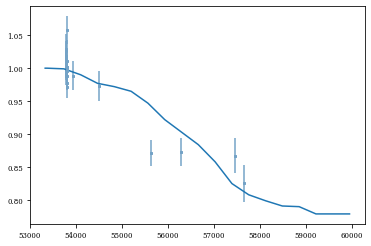

SN2006aj w1 10


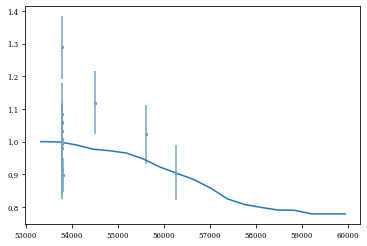

SN2006aj w1 11


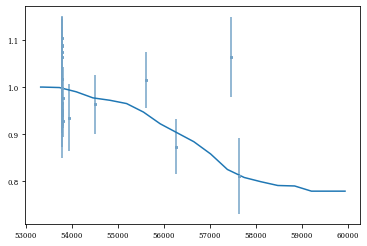

SN2006aj w1 12


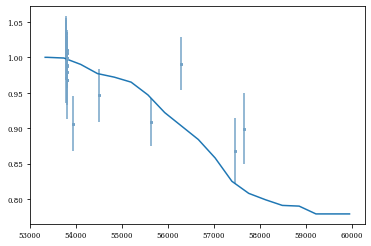

SN2006aj w1 13


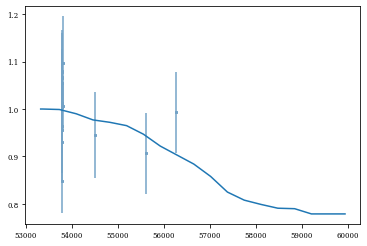

SN2006aj w1 14


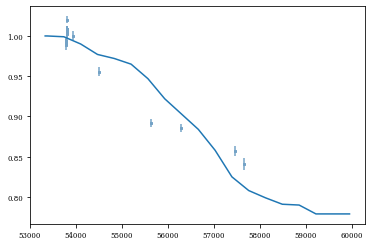

SN2006aj w1 15


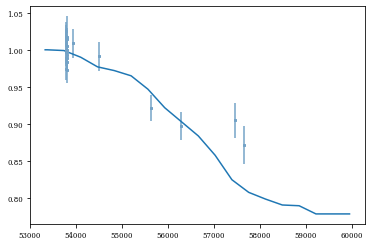

SN2006aj w1 16


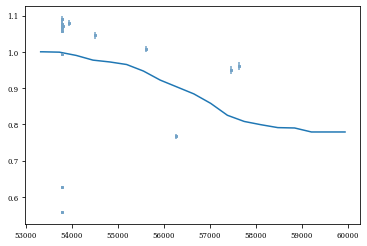

SN2006aj w1 17


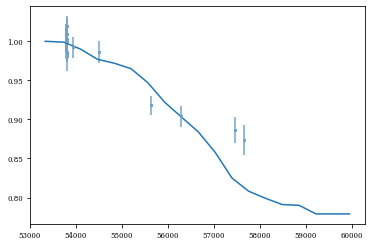

SN2006aj w1 18


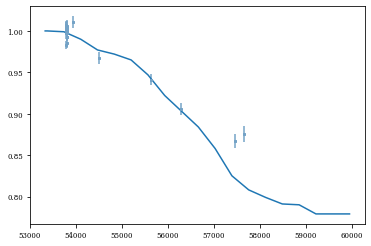

SN2006aj w1 19


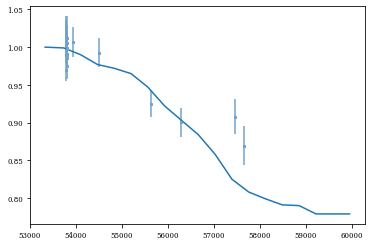

SN2006jc w1 1


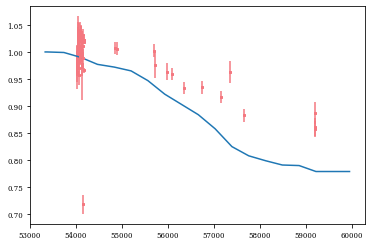

SN2006jc w1 2


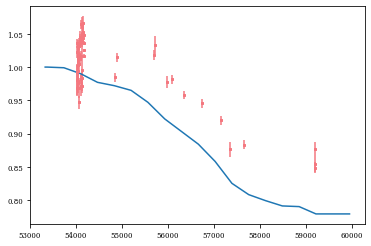

SN2006jc w1 3


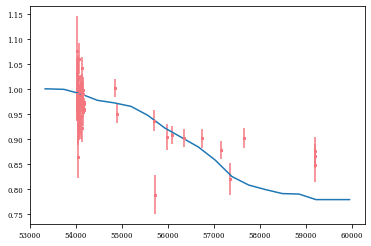

SN2006jc w1 4


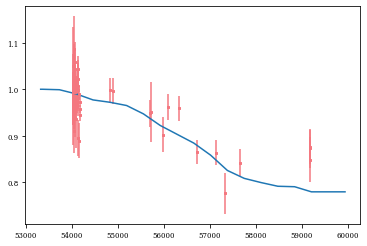

SN2006jc w1 5


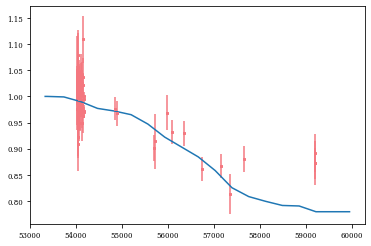

SN2006jc w1 6


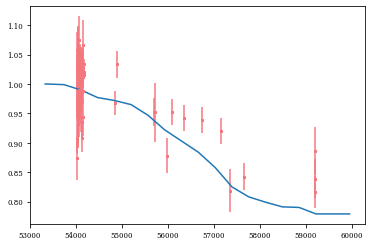

SN2006jc w1 7


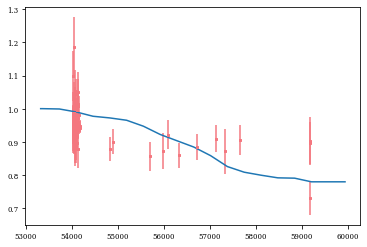

SN2006jc w1 8


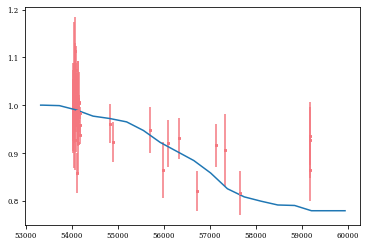

SN2006jc w1 9


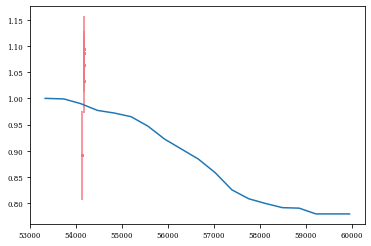

SN2006jc w1 10


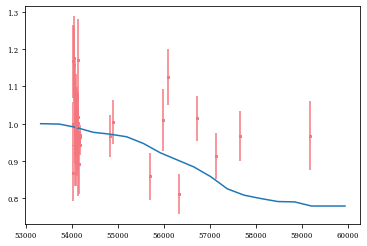

SN2006jc w1 11


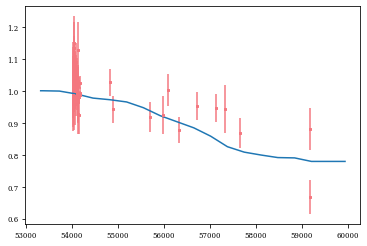

SN2006jc w1 12


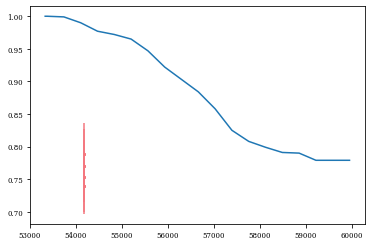

SN2006jc w1 13


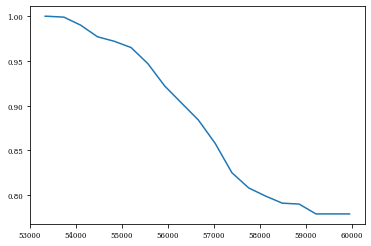

M51 m2 01


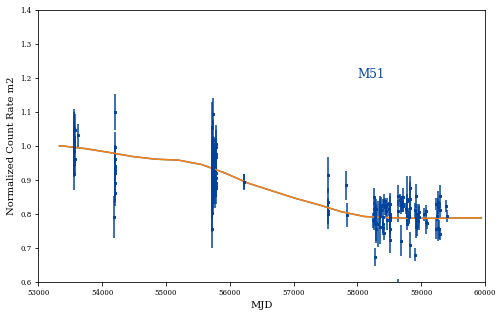

M51 m2 02


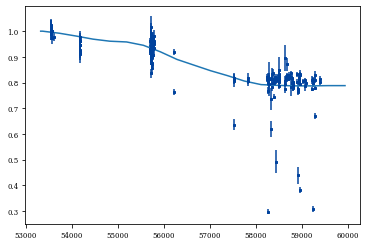

M51 m2 03


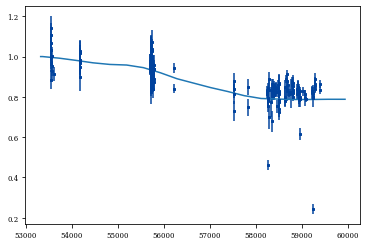

M51 m2 04


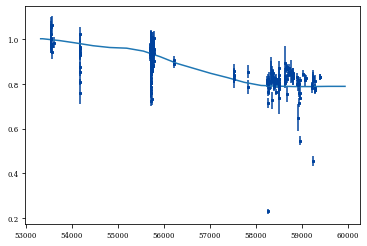

M51 m2 05


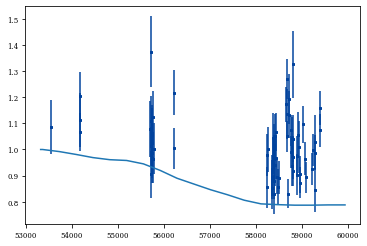

M51 m2 06


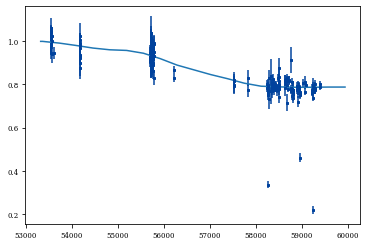

M51 m2 07


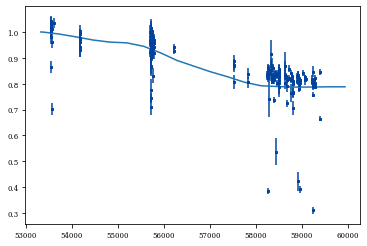

M51 m2 08


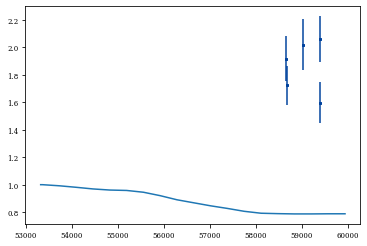

M51 m2 09


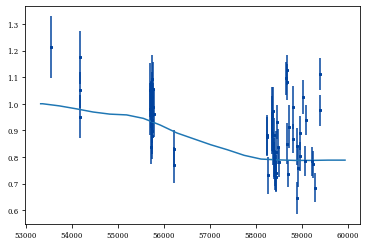

M51 m2 10


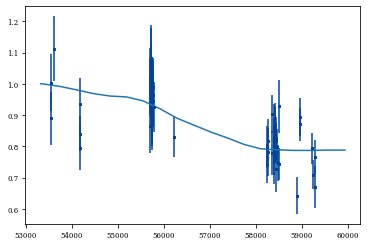

SN2006aj m2 01


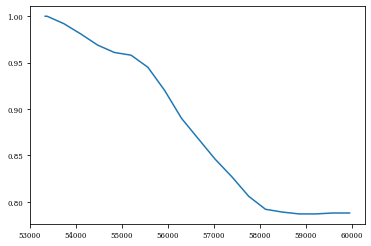

SN2006aj m2 02


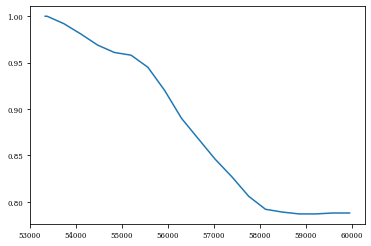

SN2006aj m2 03


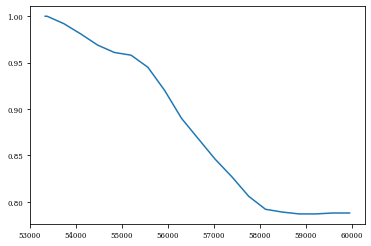

SN2006aj m2 04


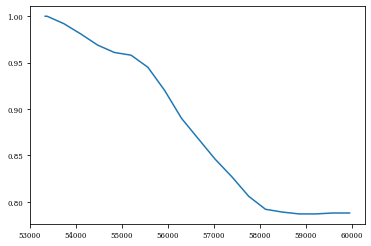

SN2006aj m2 05


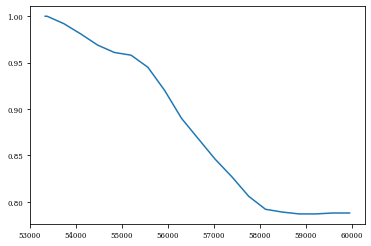

SN2006aj m2 06


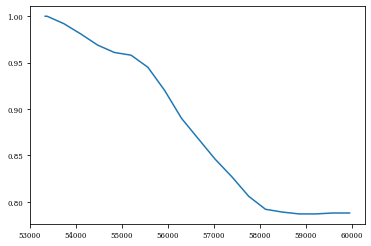

SN2006aj m2 07


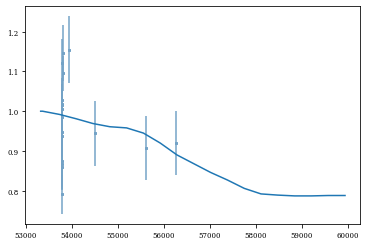

SN2006aj m2 08


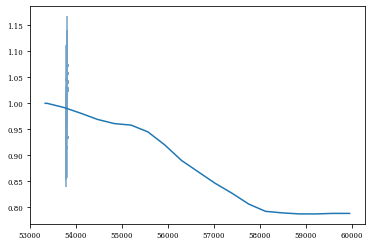

SN2006aj m2 09


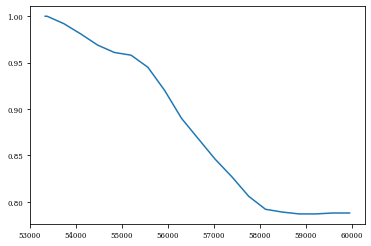

SN2006aj m2 10


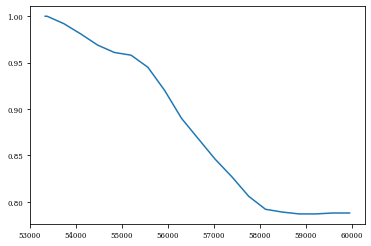

SN2006aj m2 11


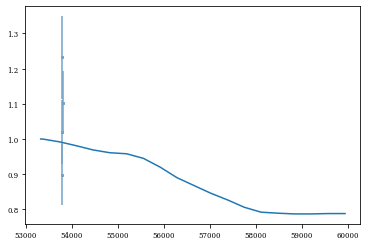

SN2006aj m2 12


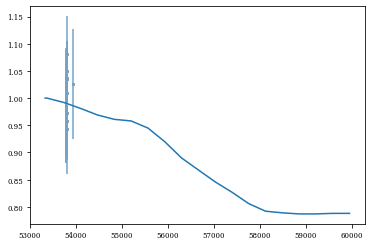

SN2006aj m2 13


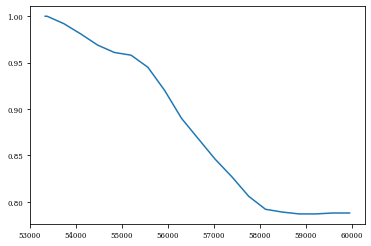

SN2006aj m2 14


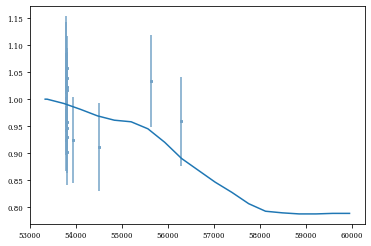

SN2006aj m2 15


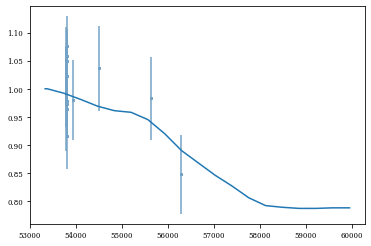

SN2006aj m2 16


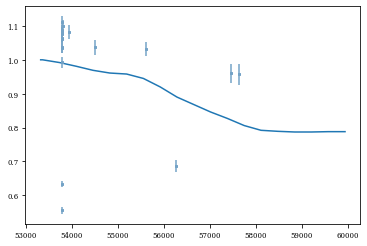

SN2006aj m2 17


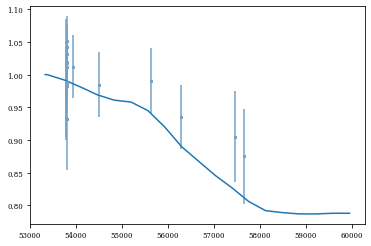

SN2006aj m2 18


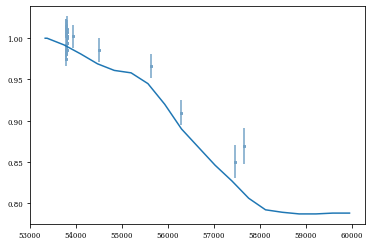

SN2006aj m2 19


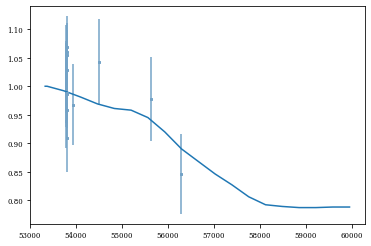

SN2006jc m2 1


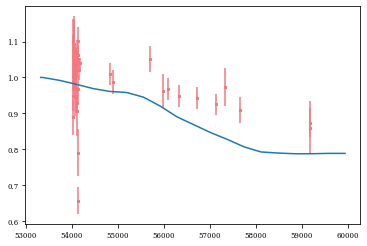

SN2006jc m2 2


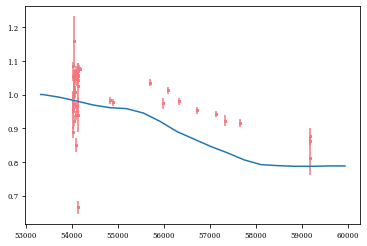

SN2006jc m2 3


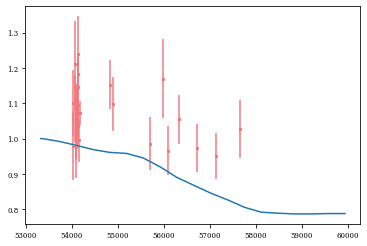

SN2006jc m2 4


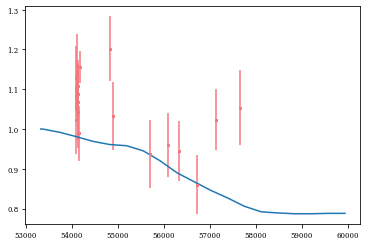

SN2006jc m2 5


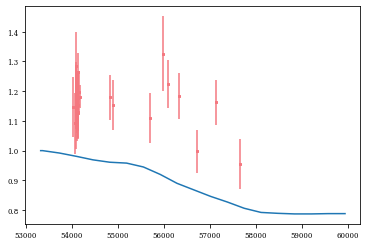

SN2006jc m2 6


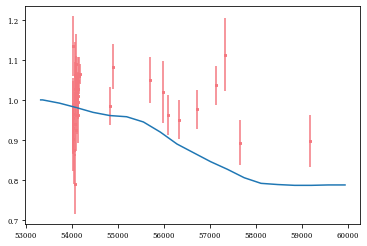

SN2006jc m2 7


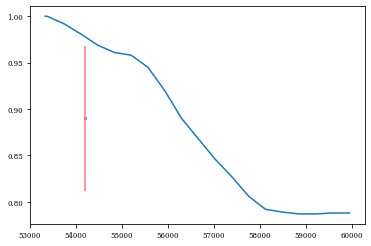

SN2006jc m2 8


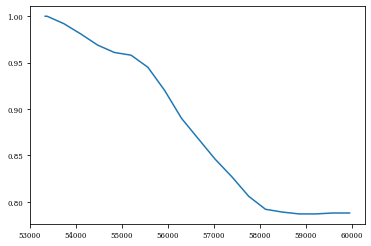

SN2006jc m2 9


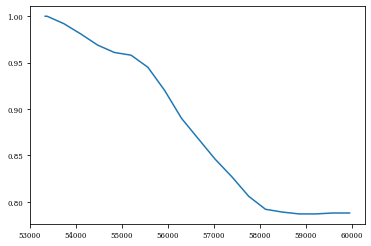

SN2006jc m2 10


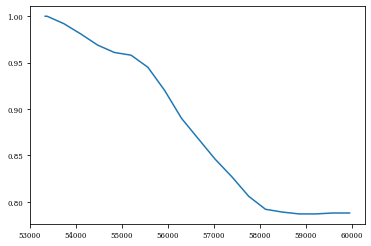

SN2006jc m2 11


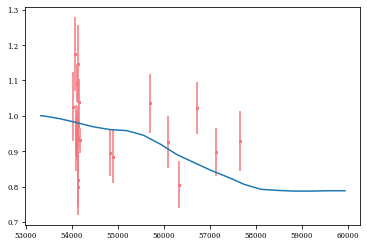

SN2006jc m2 12


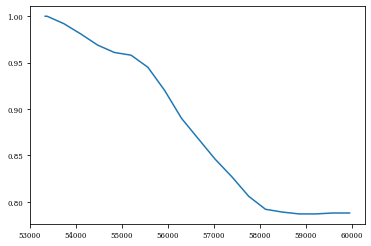

SN2006jc m2 13


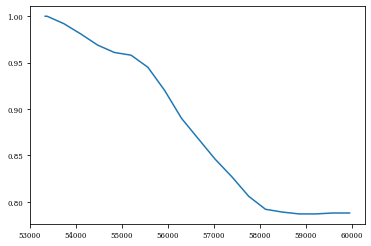

M51 w2 01


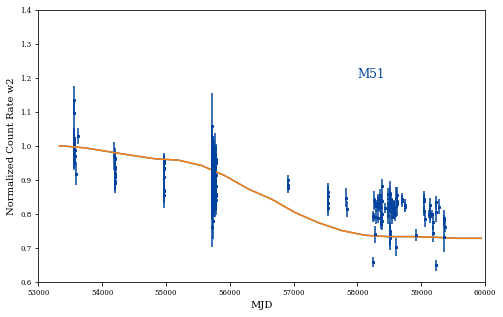

M51 w2 02


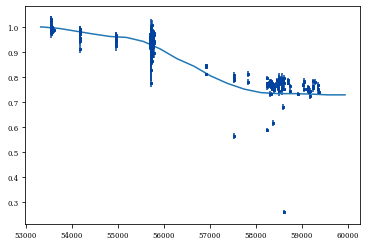

M51 w2 03


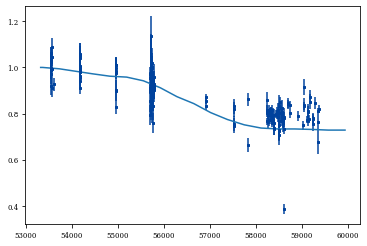

M51 w2 04


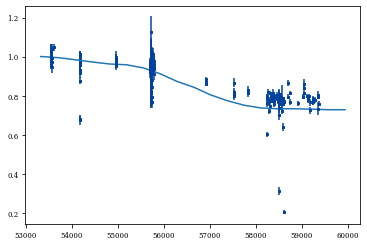

M51 w2 05


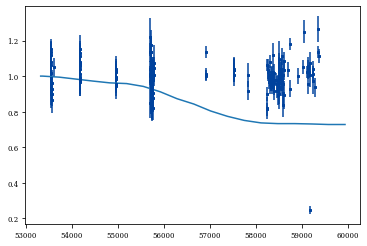

M51 w2 06


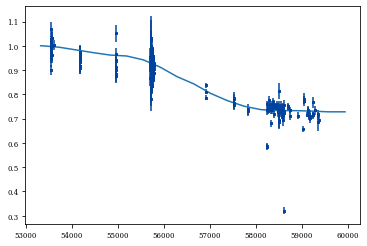

M51 w2 07


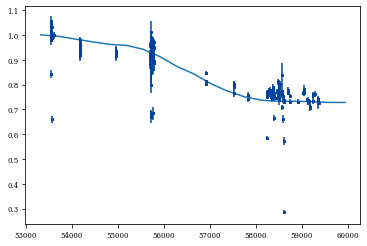

M51 w2 08


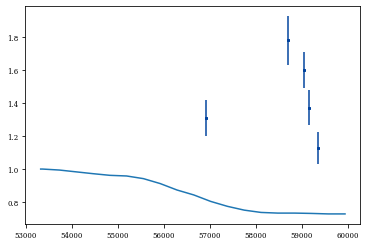

M51 w2 09


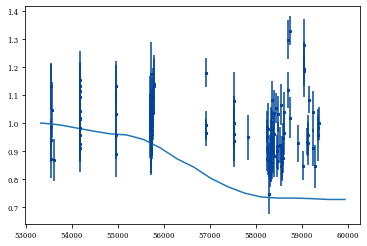

M51 w2 10


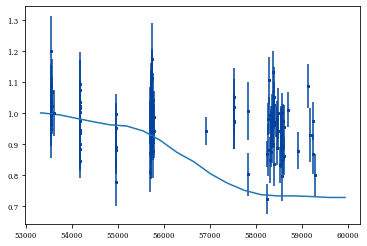

SN2006aj w2 01


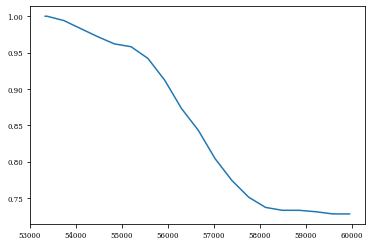

SN2006aj w2 02


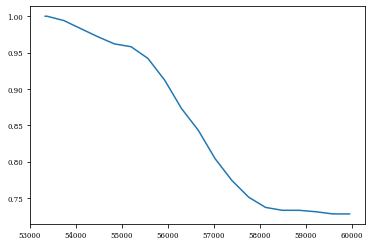

SN2006aj w2 03


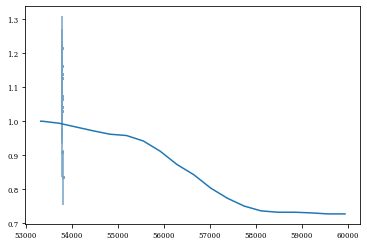

SN2006aj w2 04


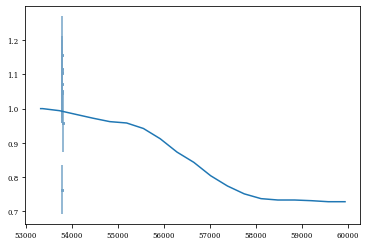

SN2006aj w2 05


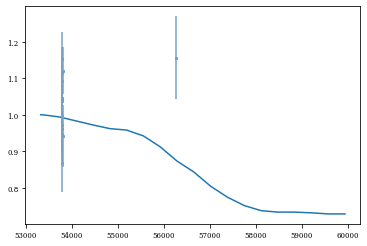

SN2006aj w2 06


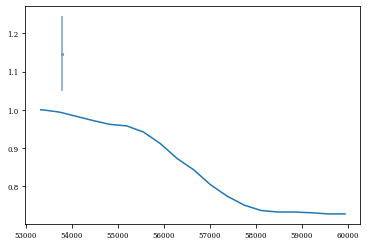

SN2006aj w2 07


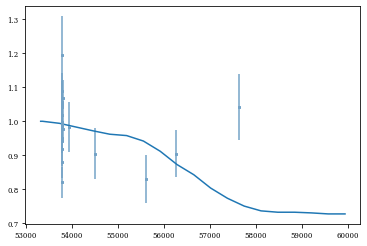

SN2006aj w2 08


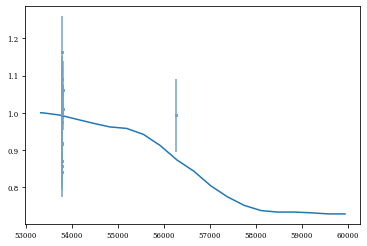

SN2006aj w2 09


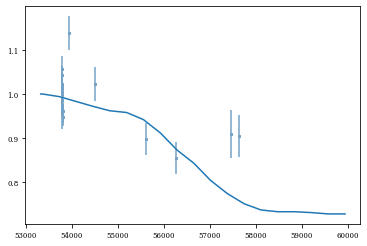

SN2006aj w2 10


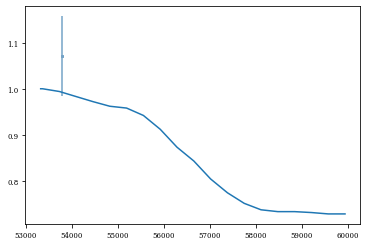

SN2006aj w2 11


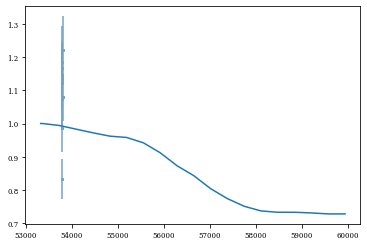

SN2006aj w2 12


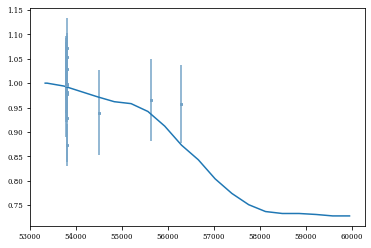

SN2006aj w2 13


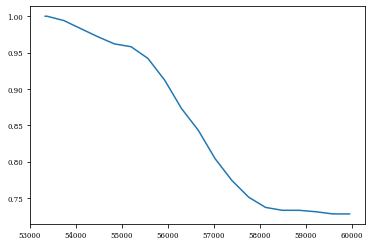

SN2006aj w2 14


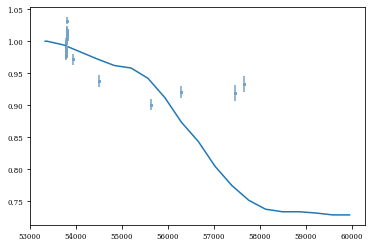

SN2006aj w2 15


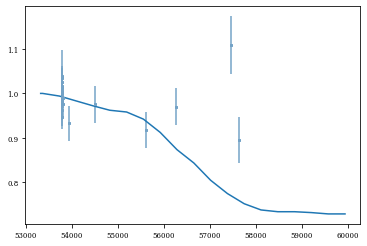

SN2006aj w2 16


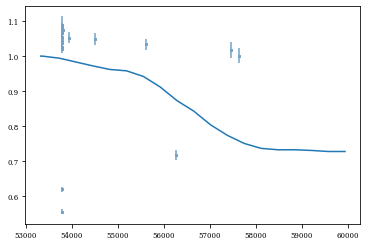

SN2006aj w2 17


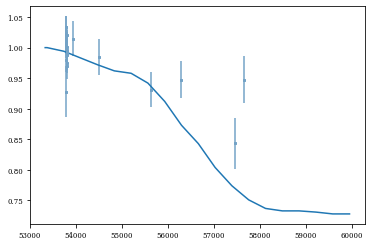

SN2006aj w2 18


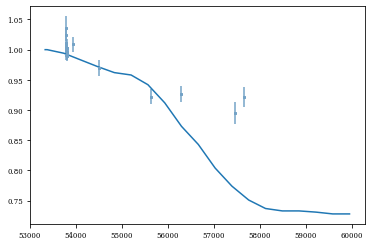

SN2006aj w2 19


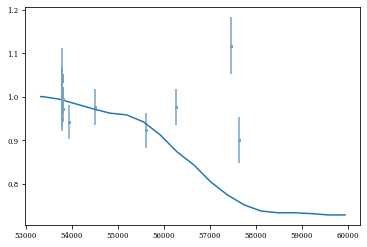

SN2006jc w2 1


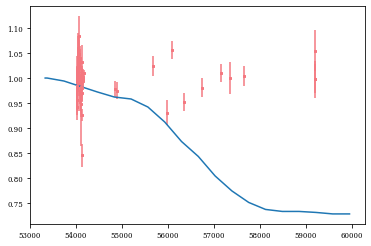

SN2006jc w2 2


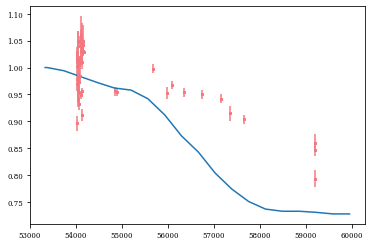

SN2006jc w2 3


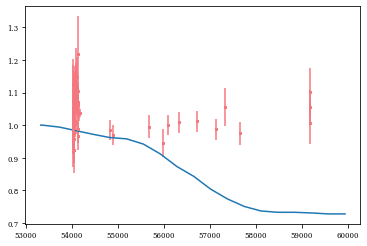

SN2006jc w2 4


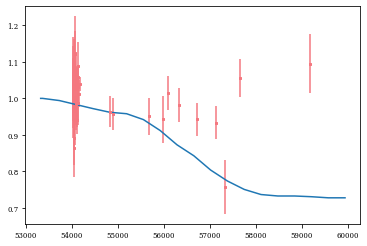

SN2006jc w2 5


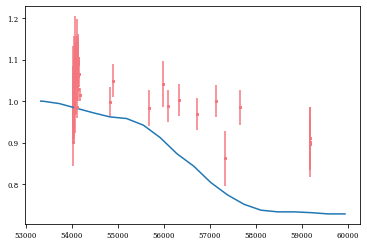

SN2006jc w2 6


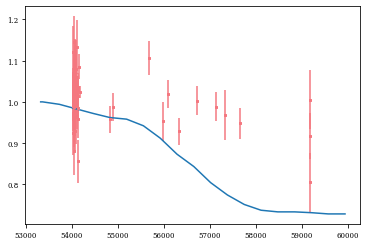

SN2006jc w2 7


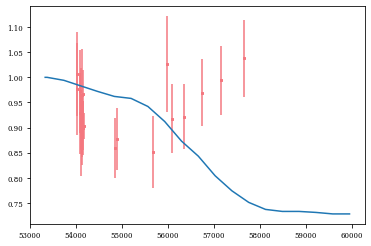

SN2006jc w2 8


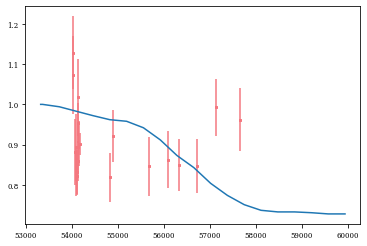

SN2006jc w2 9


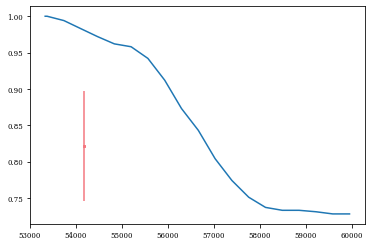

SN2006jc w2 10


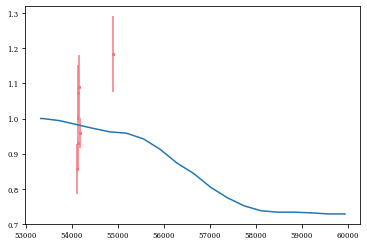

SN2006jc w2 11


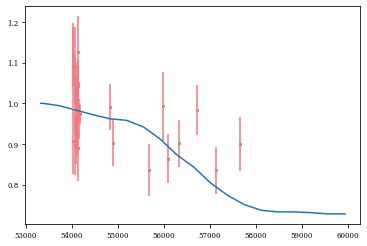

SN2006jc w2 12


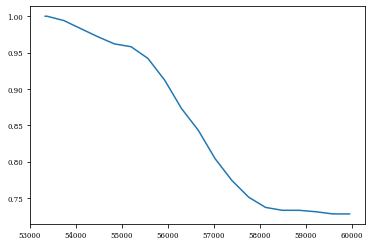

SN2006jc w2 13


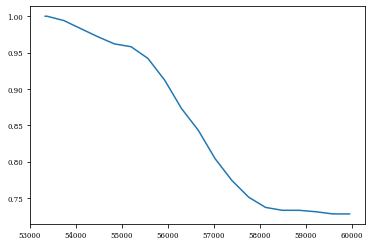

In [3]:

for filter in filters:
    #print(filter)
    index=filters.index(filter)
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)
    #plt.scatter([mjd],[cr3])
    ax.set_xlabel('MJD')
    ax.set_ylabel('Normalized Count Rate '+filter)
    ax.axis([53000.0,60000.0,0.6,1.4])
    hdul=fits.open('swusenscorr20041120v006.fits')
    data=hdul[index+1].data
    time=data['TIME']
    uvotoffset=data['OFFSET']
    uvotmjd=time/60/60/24.0+51910.0
    #print(uvotmjd)
    #plt.plot(uvotmjd,1.0-uvotoffset)
    plt.plot(uvotmjd,1/(1.0+uvotoffset))

 
    
    #print(filter)
    for field in fields:
        #print(field)
        fieldindex=fields.index(field)
        ax.text(58000, 1.2-fieldindex*0.1, field, fontsize=12, color=colors[fieldindex])
        for comp in comps:
            #print(comp)
            file='compdata/'+field+'_'+filter+'_3_5_comp'+comp+'.dat'
            mjd=[]
            cr3=[]
            cr3e=[]
            cr5=[]
            cr5e=[]
            cr3earlymean=[]
            cr5earlymean=[]
            if os.path.exists(file):
                #print(comp)
                f = open(file, 'r')
                for line in f:
                    columns=line.split()
                    mjd.append(columns[1])
                    cr3.append(columns[2])
                    cr3e.append(columns[3])
                    cr5.append(columns[4])
                    cr5e.append(columns[5])
                f.close()
                mjd=np.array(mjd, dtype=np.float32)
                cr3=np.array(cr3, dtype=np.float32)
                cr5=np.array(cr5, dtype=np.float32)
                cr3e=np.array(cr3e, dtype=np.float32)
                cr5e=np.array(cr5e, dtype=np.float32)
                earliest=np.min(mjd)
                early=[]
                #early=np.where(mjd<(earliest+80.0))
                early=np.where(mjd<54050)
                if len(early[0])>3:
                    earlymean=np.mean(cr5[early])
                    earlystd=np.std(cr5[early])
                    earlyfiltered=[e for e in cr5[early] if (earlymean - 2*earlystd < e < earlymean + 2*earlystd)]
                    cr3earlymean=stats.mean(cr3[early])
                    cr5earlymean=stats.mean(earlyfiltered)
                    cr5earlystdev=np.std(earlyfiltered)
                    #print(cr5earlymean)
                    #print(cr5earlystdev)
                    high=np.where(cr5/cr5e > 10)
                    #print(cr3/cr3e)
                    close=np.where(abs(cr5-stats.mean(cr5))<2.0*np.std(cr5))
                    #print(high and close)
                    #print(abs(cr3-stats.mean(cr3))<3*np.std(cr3))
                    #cr3[good]/cr3e[good]
                    #print(cr3[high and close])
                    good=high #and close
                    if cr5earlymean<50:
                        #plt.errorbar(mjd, cr5/cr5earlymean, cr5e/cr5earlymean, marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])
                        plt.errorbar(mjd[good], cr5[good]/cr5earlymean, cr5e[good]/cr5earlymean, marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])
                        #plt.errorbar(mjd[good], cr5[good]/cr3[good], cr5e[good]/cr3[good], marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])
                        #plt.title(filter+field+comp)
                        print(field,filter,comp)
                        plt.plot(uvotmjd,1/(1.0+uvotoffset))
                        plt.show()
                    #plt.errorbar(mjd[good], cr3[good]/cr3earlymean, cr3e[good]/cr3earlymean, marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex])
                    #plt.errorbar(mjd[good], cr5[good]/cr3[good], cr5e[good]/cr3[good], marker='s', linestyle='none', mfc=colors[fieldindex],mec=colors[fieldindex], ms=2, mew=1, color=colors[fieldindex]))
                    #print(cr5/cr5earlymean)
                    #print(good)
    #plt.show()
            
